In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

from multi_run_v2.initialize_v2 import data_pp, screener

In [2]:
#data = pd.read_pickle("Data/cmktcap_data_snapshot.pickle")
data = pd.read_pickle("Data/cmktcap_data_final.pickle")

cmktcap = data_pp(data=data,
                  vender="coinmarketcap")

In [3]:
mkt_filter = screener(cmktcap["mktcap"],
                        cmktcap["vol"],
                        1_000_000,
                        None,
                        ma=True)

vol_filter = screener(cmktcap["mktcap"],
                        cmktcap["vol"],
                        None,
                        1_000_000,
                        ma=True)

mkt_vol_filter_nonma = screener(cmktcap["mktcap"],
                          cmktcap["vol"],
                          1_000_000,
                          1_000_000,
                          ma=False)

mkt_vol_filter = screener(cmktcap["mktcap"],
                          cmktcap["vol"],
                          1_000_000,
                          1_000_000,
                          ma=True)

In [63]:
m_count  = mkt_filter.sum(1).loc['2014':].resample('Y').mean()
v_count  = vol_filter.sum(1).loc['2014':].resample('Y').mean()
mv_count = mkt_vol_filter.sum(1).loc['2014':].resample('Y').mean()

count = pd.concat([m_count, v_count, mv_count], 
          axis=1,
          keys=['mktcap', 'vol', 'mktcap & vol']).round(0).astype('int')
count

,mktcap,vol,mktcap & vol
date,,,
2014-12-31,27,3,3
2015-12-31,31,3,2
2016-12-31,56,5,5
2017-12-31,177,54,52
2018-12-31,470,192,183
2019-12-31,576,214,192
2020-12-31,739,319,280
2021-12-31,1192,680,579
2022-12-31,1279,743,553


In [70]:
m_mktcap  = (cmktcap['mktcap'] * mkt_filter).mean(1).loc['2014':].resample('Y').mean()
v_mktcap  = (cmktcap['mktcap'] * vol_filter).mean(1).loc['2014':].resample('Y').mean()
mv_mktcap = (cmktcap['mktcap'] * mkt_vol_filter).mean(1).loc['2014':].resample('Y').mean()

mktcap = pd.concat([m_mktcap, v_mktcap, mv_mktcap], 
          axis=1,
          keys=['mktcap', 'vol', 'mktcap & vol']).round(0)#.astype('int')

mktcap = (mktcap / 1_000_000).round(3)

In [75]:
m_vol  = (cmktcap['vol'] * mkt_filter).mean(1).loc['2014':].resample('Y').mean()
v_vol  = (cmktcap['vol'] * vol_filter).mean(1).loc['2014':].resample('Y').mean()
mv_vol = (cmktcap['vol'] * mkt_vol_filter).mean(1).loc['2014':].resample('Y').mean()

volume = pd.concat([m_vol, v_vol, mv_vol], 
          axis=1,
          keys=['mktcap', 'vol', 'mktcap & vol']).round(0)
volume = (volume / 1_000_000).round(3)

In [76]:
final_df = pd.concat([count, mktcap, volume], axis=1, 
                     keys=['Count', 'Mktcap', 'Volume'])
idx_list = [str(idx)[:4] for idx in final_df.index]

final_df.index = idx_list
final_df

Count                      Mktcap                          Volume   
     mktcap  vol mktcap & vol    mktcap       vol mktcap & vol   mktcap   
2014     27    3            3   277.983  2467.646     2467.646    1.321  \
2015     31    3            2   146.995  1589.807     1777.520    1.277   
2016     56    5            5   192.715  1984.444     2071.347    2.198   
2017    177   54           52   592.475  2124.204     2166.269   22.534   
2018    470  192          183   677.346  1475.672     1548.487   33.144   
2019    576  214          192   356.257   947.718     1054.787   61.794   
2020    739  319          280   417.191   951.569     1085.332  101.750   
2021   1192  680          579  1518.371  2647.979     3100.600  131.260   
2022   1279  743          553   965.152  1631.860     2152.760   63.320   
2023   1391  725          556   698.565  1322.631     1724.631   37.509   

                            
          vol mktcap & vol  
2014   10.626       10.626  
2015   14.765       16.174  
2016   22.383       23.483  
2017   69.658       71.155  
2018   75.108       78.446  
2019  163.847      181.990  
2020  239.139      269.673  
2021  234.138      270.125  
2022  114.478      143.934  
2023   75.055       93.449

In [78]:
final_df.columns

MultiIndex([( 'Count',       'mktcap'),
            ( 'Count',          'vol'),
            ( 'Count', 'mktcap & vol'),
            ('Mktcap',       'mktcap'),
            ('Mktcap',          'vol'),
            ('Mktcap', 'mktcap & vol'),
            ('Volume',       'mktcap'),
            ('Volume',          'vol'),
            ('Volume', 'mktcap & vol')],
           )

In [4]:
font = {'family': 'serif', 'style': 'italic'}

mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

<AxesSubplot:xlabel='date'>

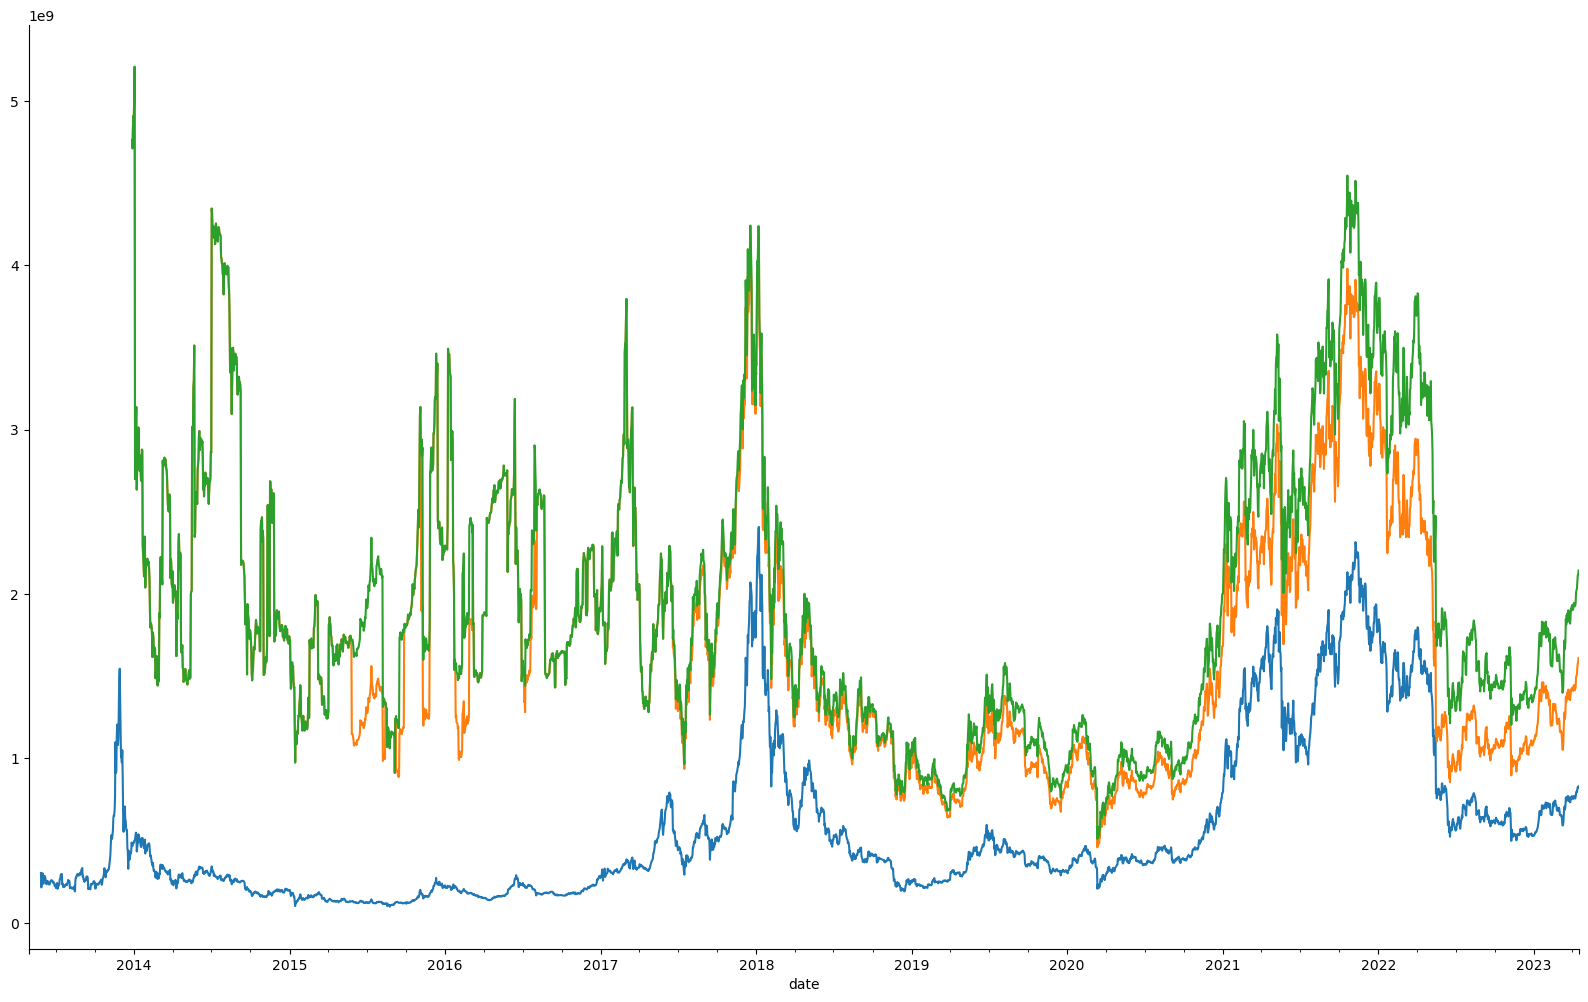

In [15]:
(mkt_filter * cmktcap['mktcap']).mean(1).plot(figsize=(20,12))
(vol_filter * cmktcap['mktcap']).mean(1).plot()
(mkt_vol_filter * cmktcap['mktcap']).mean(1).plot()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


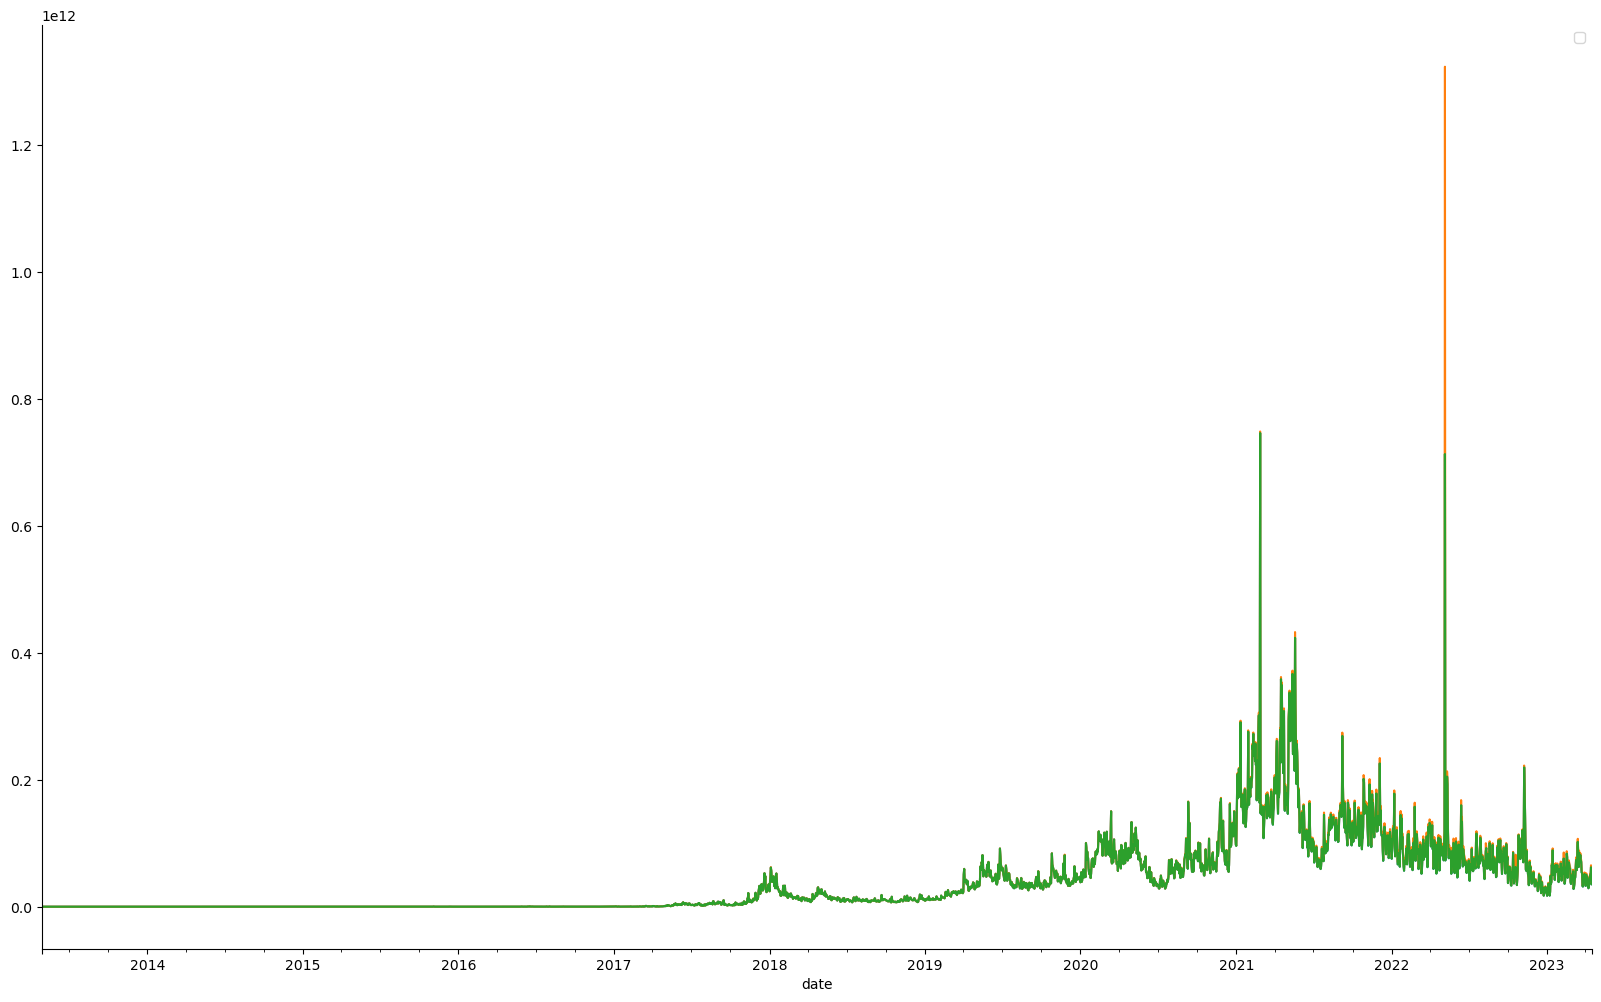

In [32]:
(mkt_filter * cmktcap['vol']).sum(1).plot(figsize=(20,12))
(vol_filter * cmktcap['vol']).sum(1).plot()
(mkt_vol_filter * cmktcap['vol']).sum(1).plot()

plt.legend()

Text(0, 0.5, 'Number of Coins')

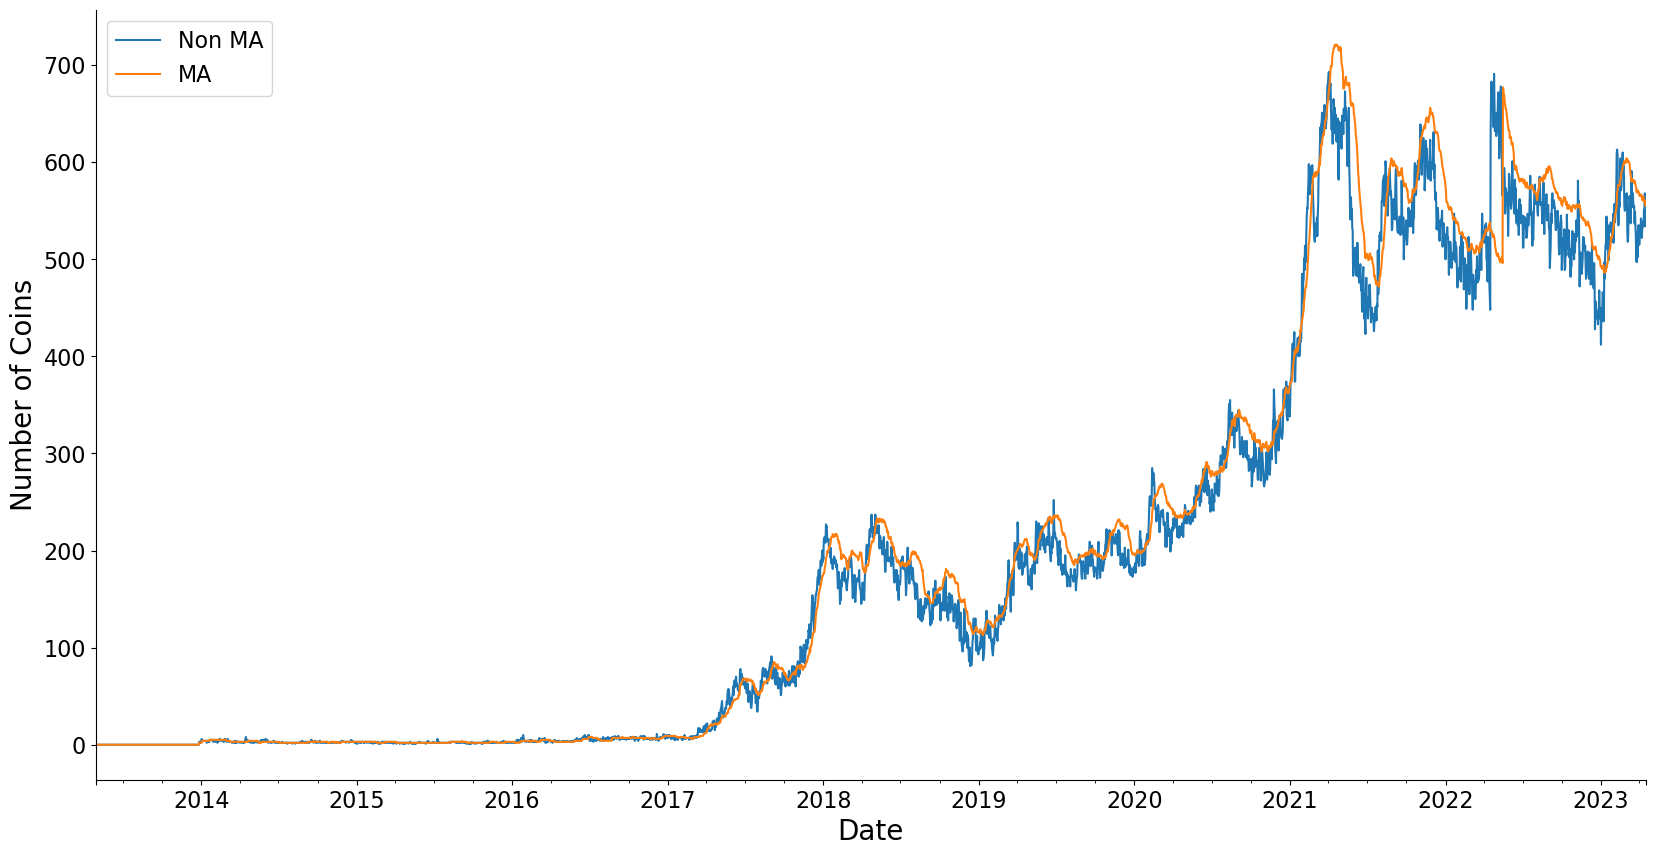

In [7]:
mkt_vol_filter_nonma.sum(1).plot(figsize=(20,10),   fontsize=16)
mkt_vol_filter.sum(1).plot( )

plt.legend(["Non MA", "MA"], fontsize=16)
plt.xlabel("Date", fontsize=20)
plt.ylabel("Number of Coins", fontsize=20)